In [1]:
from generator import fast_sbm, create_connectivity_matrix
import matplotlib.pyplot as plt
from matrices import skew_adjacency, hermitian_product, hermitian_adjacency
from diagonalizer import compute_eigenvalues
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')
import numpy as np

# Preliminary : colorplots of matrix


In [90]:
def do_colorplot(F, p, fname):
    matrix = np.zeros((100, 100))
    n_clusters = F.shape[0]
    c = np.zeros(1 + n_clusters, dtype = int)
    c[1:] = ( 100 * np.cumsum(p) ).astype(int)
    print(c)
    for i in range(n_clusters):
        for j in range(n_clusters):
            matrix[c[i]:c[i+1], c[j]:c[j+1]] = F[i,j]
    fig,ax = plt.subplots()
    ax.axis('off')
    ax.matshow(matrix, cmap='Purples')
    plt.savefig(fname,bbox_inches='tight')

    plt.show()

In [29]:
eigenvaluecolor = 'k'
circlecolor = 'wheat'
circlealpha = 0.6
linescolor = 'sienna'

# First picture
Two blocks with the same size, but the connectivity is equal to $$ F = \begin{pmatrix}5 & 8 \\ 2 & 5 \end{pmatrix}$$ 

[  0  50 100]


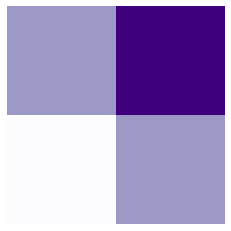

In [91]:

n, p, eta = 1000, 10, 0.8
F, eigvals_of_F = create_connectivity_matrix(p / 2, p * eta, p * (1 - eta), p / 2)
rho = np.sqrt(max(eigvals_of_F/2))
do_colorplot(F, np.array([0.5, 0.5]), "pictures/F1.pdf")

In [51]:
A = fast_sbm(n, F=F)
spec = compute_eigenvalues(A, n-2, is_sym=False)

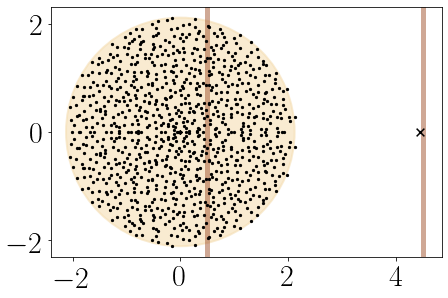

In [88]:

fig, ax = plt.subplots(figsize=(7, 5))
ax.set_aspect('equal')
for z in eigvals_of_F:
    ax.axvline(z/2, color=linescolor, linewidth = 5, alpha=0.5)
#plt.savefig("ARI_{}.png".format(n))
ax.scatter(spec.real, spec.imag, s=5, c='k', zorder=10)
ax.scatter(spec[-1].real, spec[-1].imag, s=60, c='k', zorder=10, marker='x')

circle = plt.Circle((0, 0), rho, color='wheat', linestyle = '-', linewidth=2, alpha=0.6)
ax.add_artist(circle)

ax.tick_params(axis='both', labelsize=30 )
plt.savefig("pictures/eigenvalues1.pdf",bbox_inches='tight')

plt.show()

# Second picture
Three blocks with relative sizes en the right $(0.3, 0.2, 0.5)$ and sizes on the left $(0.7, 0.1, 0.2)$. The connectivity matrix is 
$$F = \begin{pmatrix}15 & 1 & 7 \\ 0 & 8 & 2 \\ 1 & 10 & 15 \end{pmatrix}$$

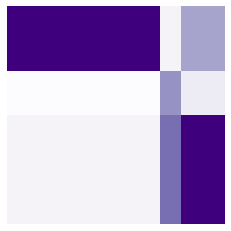

In [92]:
n=1000
F2 = np.array([[15, 1, 7], [0, 8, 2], [1, 10, 15]])

P2 = np.array([0.3, 0.2, 0.5])
Q2 = np.array([0.7, 0.1, 0.2])
mat = np.zeros((100, 100))
nn = [0, 30, 50, 100]
mm = [0, 70, 80, 100]
for i in range(3):
    for j in range(3):
        mat[nn[i]:nn[i+1], mm[j]:mm[j+1]] = F2[i,j]/100
#plt.matshow(mat)
e = np.linalg.eig(mat)[0]
rho2 = np.sqrt(max(np.abs(e)))
L2 = np.abs(e[:3])
fig,ax = plt.subplots()
ax.axis('off')
ax.matshow(mat, cmap='Purples')
plt.savefig("pictures/F2.pdf", bbox_inches='tight')
plt.show()


In [58]:
n=1000
A2 = fast_sbm(n, F2, Q2, P2)
spec2 = compute_eigenvalues(A2, n-2, is_sym=False)


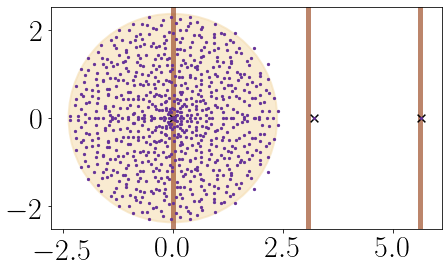

In [87]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_aspect('equal')
for i in range(len(L2)):
    ax.axvline(L2[i], color=linescolor, linewidth = 5, alpha=0.7)
    ax.scatter(spec2[-i].real, spec2[-i].imag, s=60, c='k', zorder=10, marker='x')

#plt.savefig("ARI_{}.png".format(n))
ax.scatter(spec2.real, spec2.imag, s=5, c='rebeccapurple', zorder=10)
circle = plt.Circle((0, 0), rho2, color='wheat', linestyle = '-', linewidth=2, alpha=0.6)

ax.add_artist(circle)
ax.tick_params(axis='both', labelsize=30 )
plt.savefig("pictures/eigenvalues2.pdf",bbox_inches='tight')

plt.show()

# Third picture
4 blocks with the same size. The connectivity matrix is purely triangular; on the diagonal, the eigenvalues are 1 + 4*i, and above the diagonal entries are random in [0,10].

1.8027756377319946 
 [0.25 1.25 2.25 3.25] 
outliers : [2.25 3.25]
[  0  25  50  75 100]


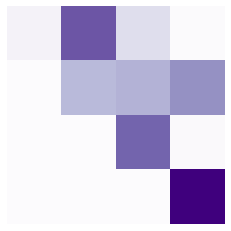

In [93]:
n=1000
b = 4
F3 = np.zeros((b,b))

for i in range(b):
    F3[i,i] = 1 + 4 * i
    for j in range(i+1,b):
        F3[i,j]=10*np.random.rand()

P3 = np.array([1/b for i in range(b)])
modularity = F3*P3.reshape(b,1)
L3, v = np.linalg.eig(modularity)

L3 = np.abs(L3)
rho3 = np.sqrt(max(L3))
print(rho3, '\n', L3, '\noutliers : {}'.format(L3[L3>rho3]))
do_colorplot(F3, P3, "pictures/F3.pdf")




In [84]:
A3 = fast_sbm(n, F3, P3, P3)
spec3 = compute_eigenvalues(A3, n-3, is_sym=False)


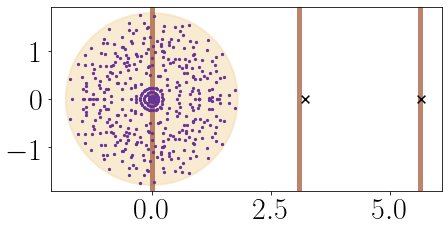

In [86]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_aspect('equal')
for i in range(len(L2)):
    ax.axvline(L2[i], color=linescolor, linewidth = 5, alpha=0.7)
    ax.scatter(spec2[-i].real, spec2[-i].imag, s=60, c='k', zorder=10, marker='x')

#plt.savefig("ARI_{}.png".format(n))
ax.scatter(spec3[:-2].real, spec3[:-2].imag, s=5, c='rebeccapurple', zorder=10)
circle = plt.Circle((0, 0), rho3, color='wheat', linestyle = '-', linewidth=2, alpha=0.6)
ax.add_artist(circle)
ax.tick_params(axis='both', labelsize=30 )
plt.savefig("pictures/eigenvalues3.pdf",bbox_inches='tight')

plt.show()